Index(['epoch',
       'Group: SCVAE2D(64)?dataset=CelebA&batch_size=128&count_sampling=EXACT&pixel_sampling=EXACT&max_epochs=100 - val_kl_loss',
       'Group: SCVAE2D(64)?dataset=CelebA&batch_size=128&count_sampling=EXACT&pixel_sampling=EXACT&max_epochs=100 - val_kl_loss__MIN',
       'Group: SCVAE2D(64)?dataset=CelebA&batch_size=128&count_sampling=EXACT&pixel_sampling=EXACT&max_epochs=100 - val_kl_loss__MAX',
       'Group: VAE(64)?dataset=CelebA&batch_size=128&max_epochs=100 - val_kl_loss',
       'Group: VAE(64)?dataset=CelebA&batch_size=128&max_epochs=100 - val_kl_loss__MIN',
       'Group: VAE(64)?dataset=CelebA&batch_size=128&max_epochs=100 - val_kl_loss__MAX'],
      dtype='object')
Group: SCVAE2D(64)?dataset=CelebA&batch_size=128&count_sampling=EXACT&pixel_sampling=EXACT&max_epochs=100 - val_kl_loss
Group: VAE(64)?dataset=CelebA&batch_size=128&max_epochs=100 - val_kl_loss


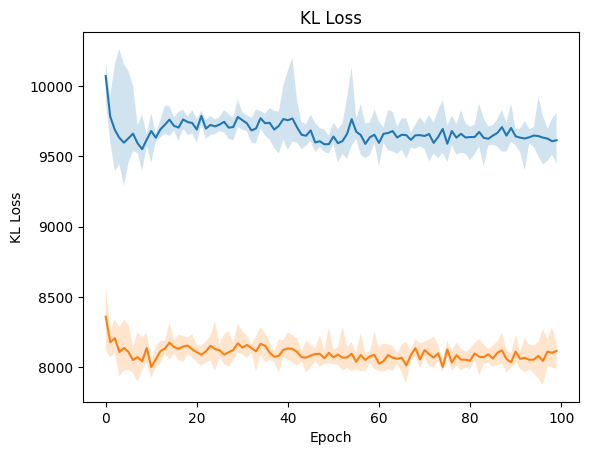

In [1]:
from gettext import find
from requests import get
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
from crossval_result_loader import get_reduction_factor
from seaborn import lineplot

path_to_csv = "plots/SCVAE2D_EXACT/kl_loss_cross.csv"

df = pd.read_csv(path_to_csv)

# drop columns that are not needed
for column in df.columns:
    if "step" in column:
        df = df.drop(column, axis=1)

print(df.columns)

def get_main_columns(df):
    main = []
    for column_0 in df.columns:
        for column_1 in df.columns:
            if column_0 in column_1 and column_0 != column_1 and column_0 not in main and column_0 != "epoch":
                main.append(column_0)
                print(column_0)
    return main
    

def plot_csv_crossval(df, title="KL Loss", y_label="KL Loss"):
    
    path = "../paper/figures/results/scvae2d/"
    os.makedirs(path, exist_ok=True)
    
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel("Epoch")
    for main_column in get_main_columns(df):
        ax = lineplot(data=df, x=df["epoch"], y=main_column, errorbar=None)
        ax.fill_between(df["epoch"], df[main_column + "__MIN"], df[main_column + "__MAX"], alpha=0.2)

    plt.savefig(path + "kl_loss.pgf")
    plt.show()
 
plot_csv_crossval(df)